<a href="https://colab.research.google.com/github/Aswin-Kumar66/ml-practise/blob/main/Regression_with_a_Mohs_Hardness_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [4]:
train.isna().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [5]:
train.nunique()

id                       10407
allelectrons_Total         325
density_Total             1099
allelectrons_Average       629
val_e_Average              205
atomicweight_Average       849
ionenergy_Average          898
el_neg_chi_Average         745
R_vdw_element_Average      737
R_cov_element_Average      698
zaratio_Average            815
density_Average            599
Hardness                    50
dtype: int64

In [65]:
train = train.drop_duplicates()

<Axes: >

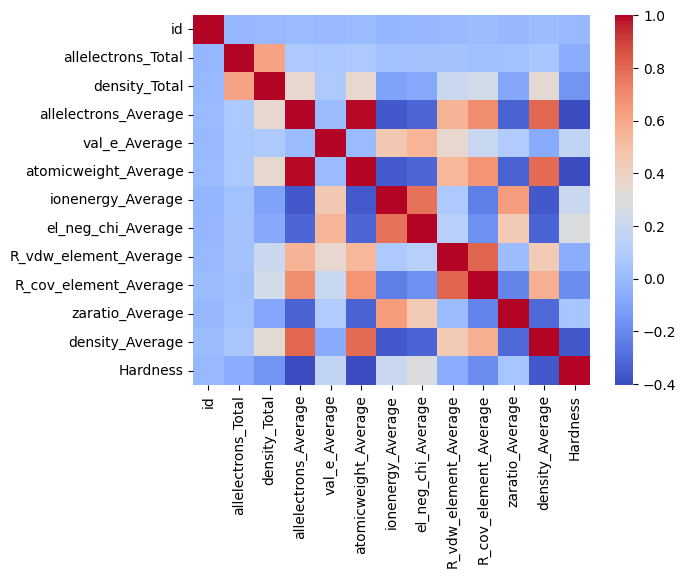

In [7]:
import seaborn as sns

sns.heatmap(train.corr() , cmap = 'coolwarm')

In [66]:
train = train.drop('id',  axis = 1)

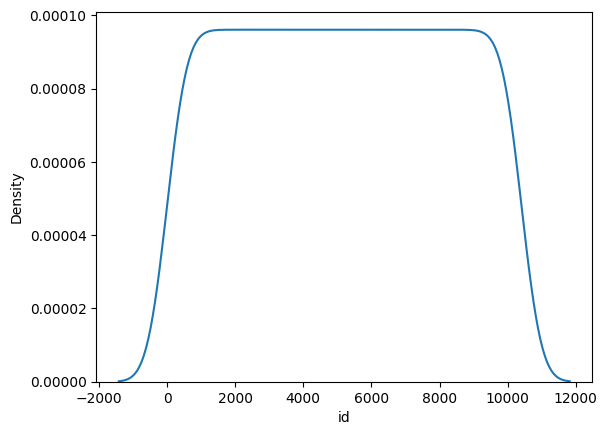

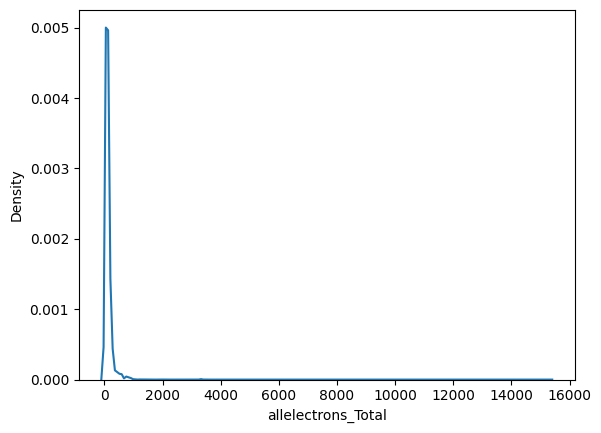

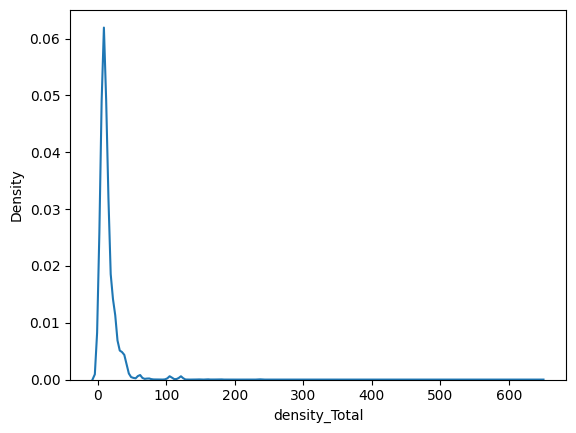

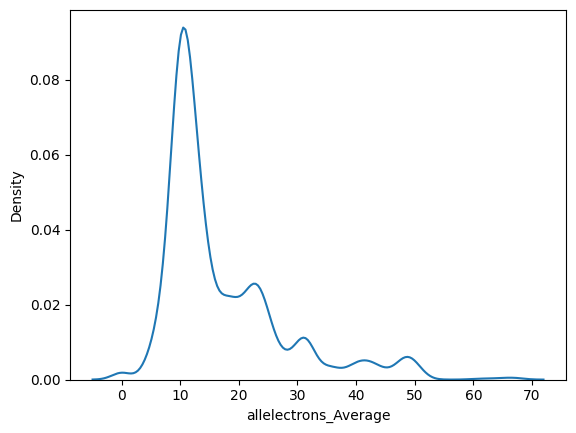

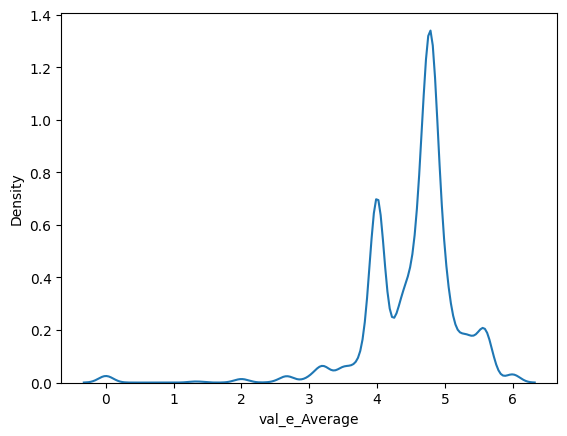

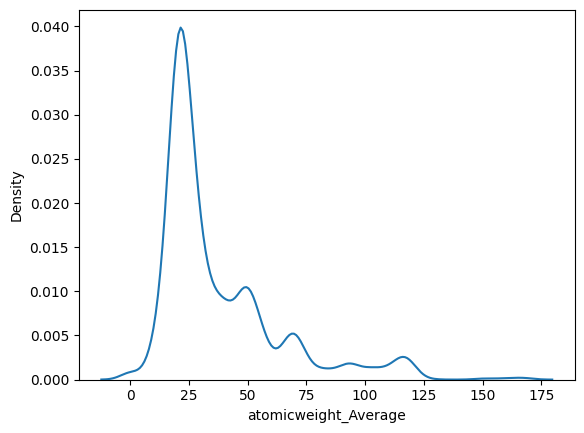

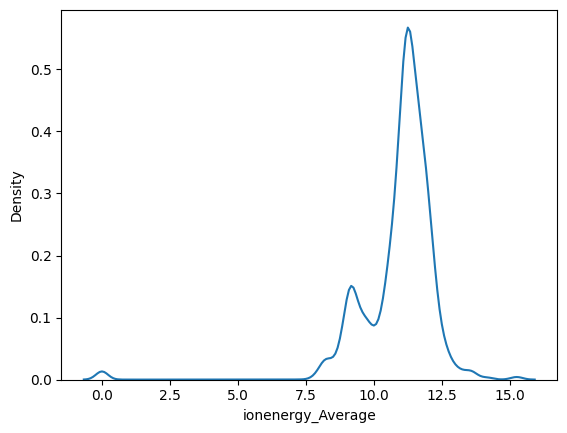

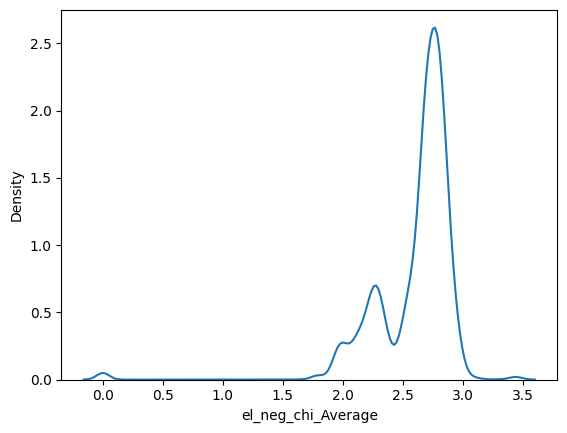

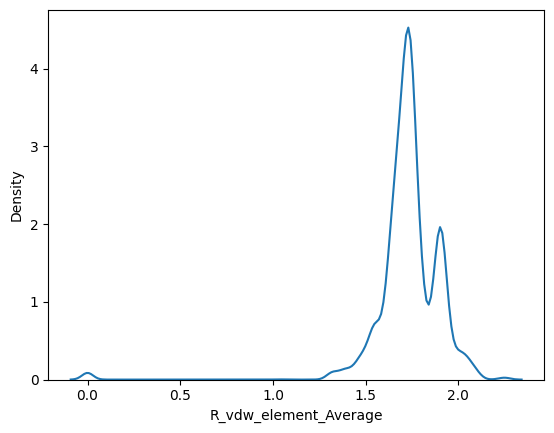

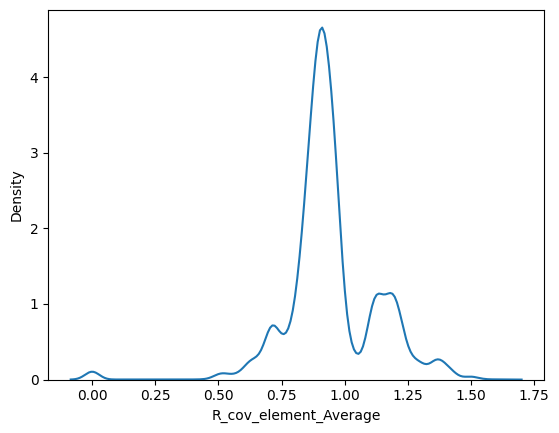

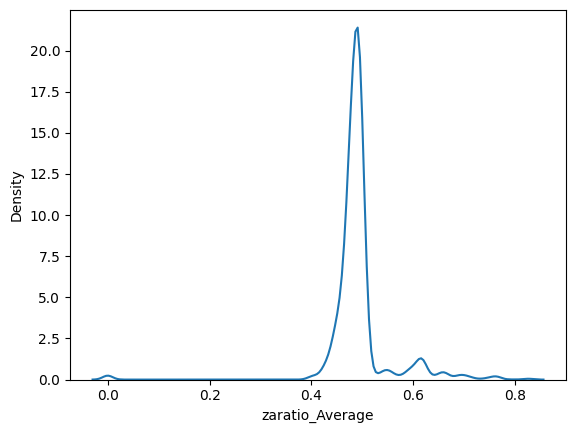

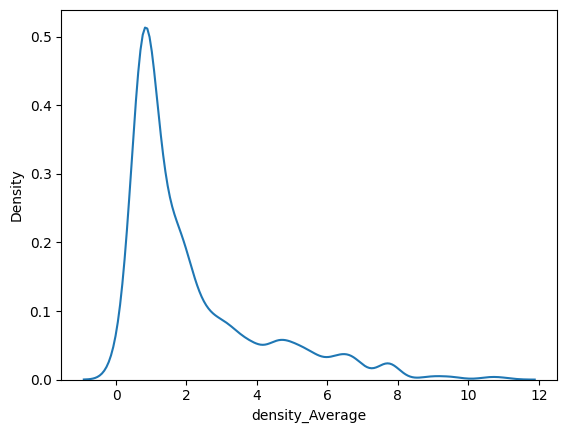

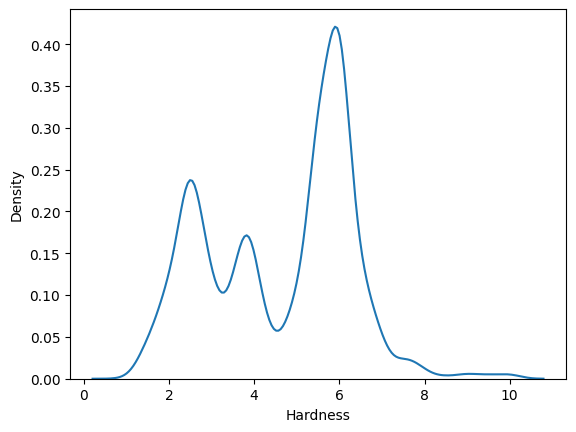

In [9]:
from matplotlib import pyplot as plt

for i in train.columns :
  sns.kdeplot(train[i])
  plt.show()

In [77]:
X = train.drop(['Hardness'] , axis = 1)
y  = train['Hardness']

In [78]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
# df = train['val_e_Average'].to_numpy().reshape(-1 , 1)
# # df = np.log(df)

transform = PowerTransformer(method='yeo-johnson')

for i in X.columns :
  df = X[i].to_numpy().reshape(-1,1)
  df = transform.fit_transform(df)
  X[i] = df

# sns.kdeplot(df)
X

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0.000261,-2.535381,-0.678758,0.318733,-0.658366,-0.002070,0.492194,-0.129118,-0.506463,0.016145,-0.625027
1,0.000261,-0.463998,-0.678758,0.318733,-0.680647,0.976717,0.437170,-0.777764,-0.230970,-0.038309,-0.925366
2,-0.359743,-0.264417,0.080028,2.073857,0.092037,1.027589,0.817291,0.270650,-0.484648,-0.219812,0.025980
3,0.000261,-0.277200,-0.678758,0.318733,-0.686772,-0.132016,-0.058807,-0.807584,-0.085312,-0.094157,-0.809349
4,0.201928,-0.170461,-0.432296,0.318733,-0.373143,0.739973,0.492194,-0.461463,-0.308722,-0.038033,0.305072
...,...,...,...,...,...,...,...,...,...,...,...
10402,0.338438,-0.463998,-0.375032,-0.991936,-0.290695,0.231500,-0.076025,-0.777764,-0.330849,0.016145,0.256347
10403,-1.460331,-2.007651,-0.678758,1.435193,-0.647497,3.795807,2.505599,-1.200086,-0.470083,-0.237285,-0.770143
10404,0.955359,1.391776,0.910650,1.827811,0.854536,-0.872443,-1.265883,-1.262395,0.992138,-0.407826,0.466893
10405,-1.197355,-2.103201,-0.282970,0.071272,-0.277096,0.191844,0.379661,0.043297,0.164919,-0.138839,-0.827901


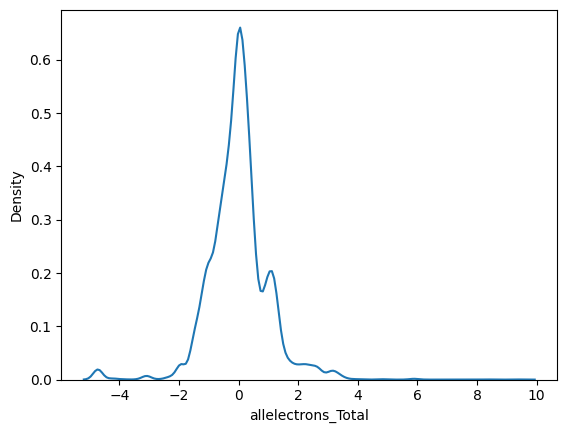

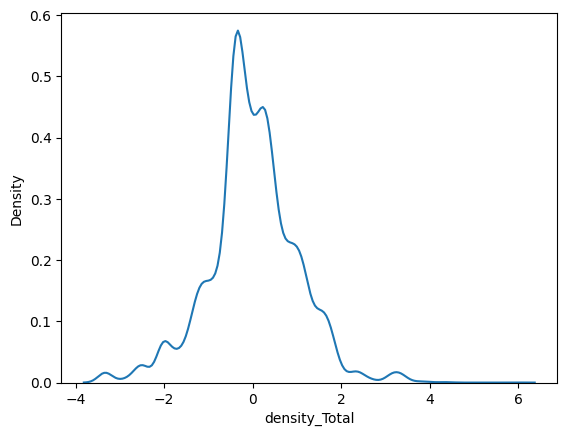

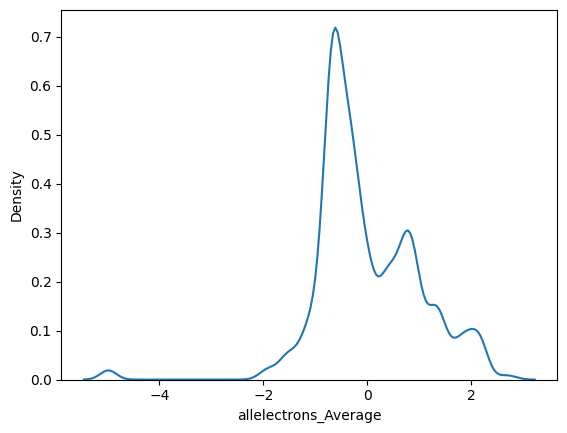

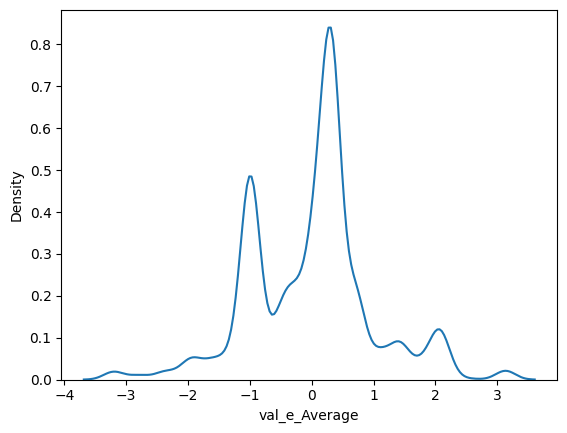

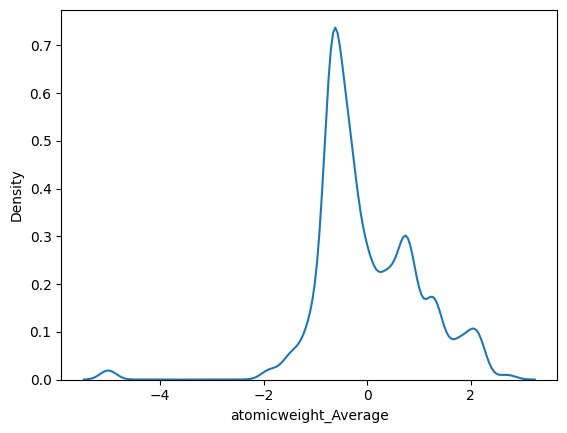

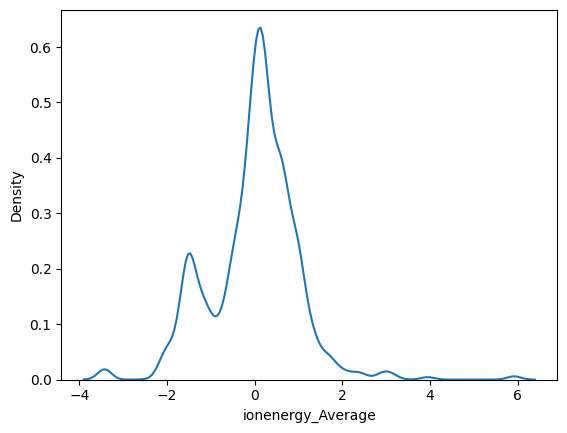

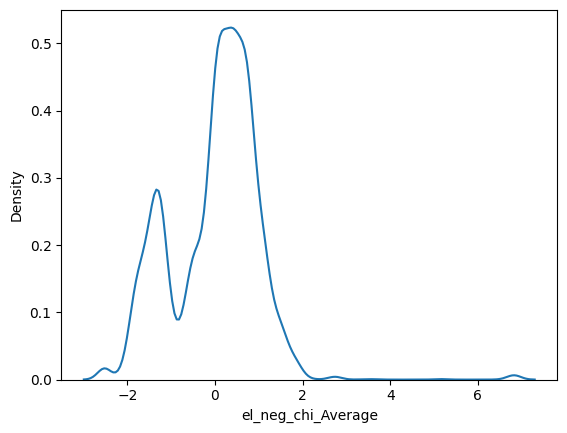

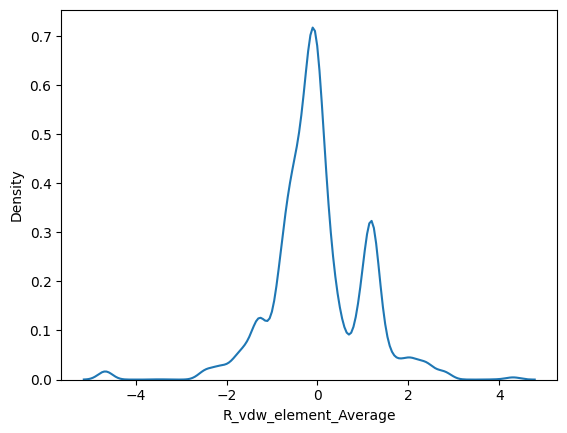

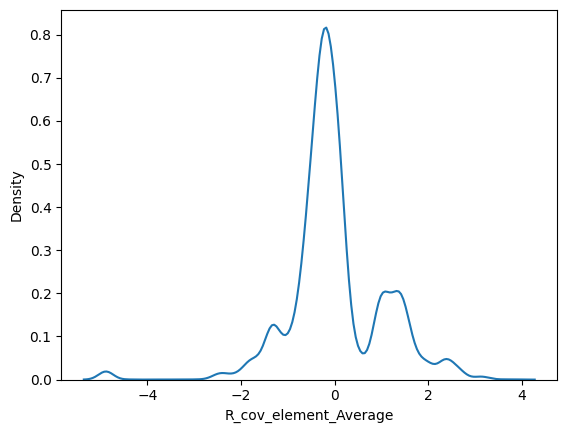

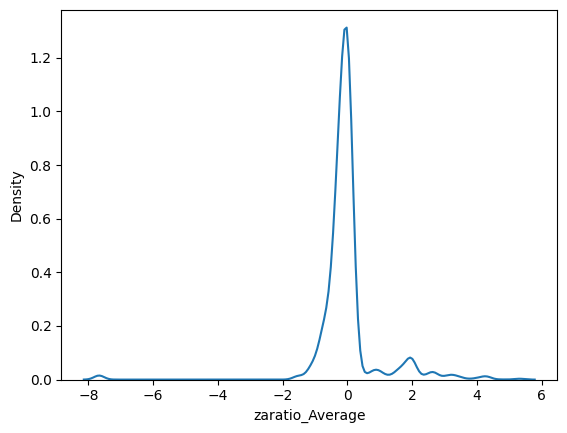

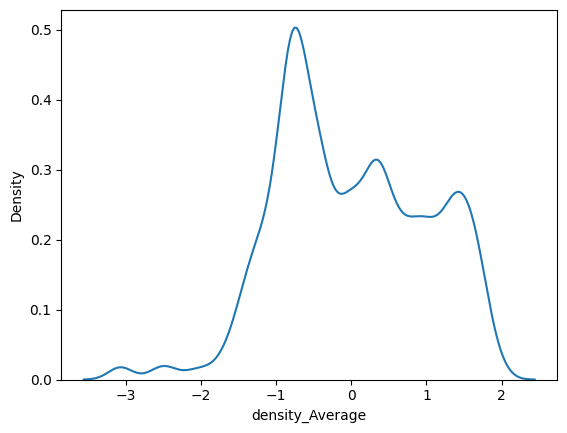

In [71]:
for i in X.columns :
  sns.kdeplot(X[i])
  plt.show()

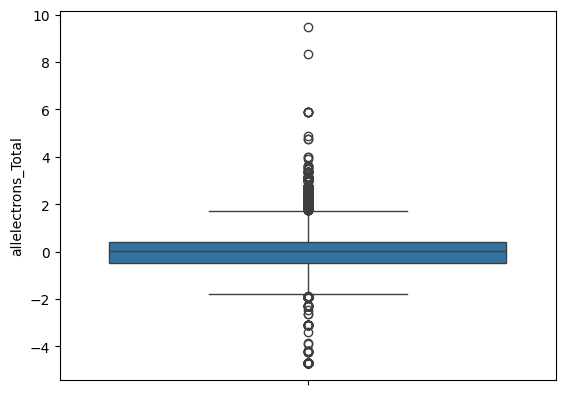

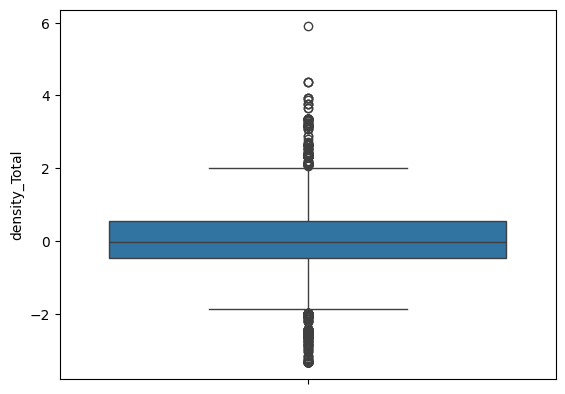

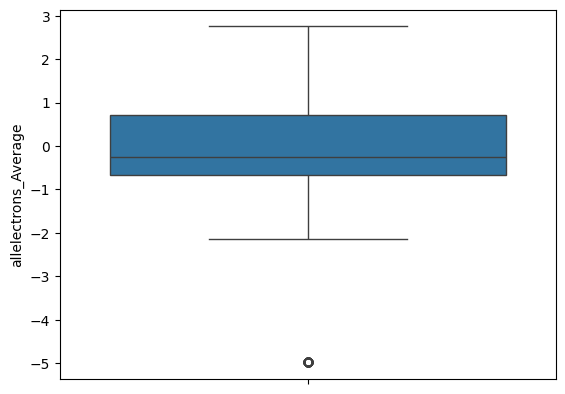

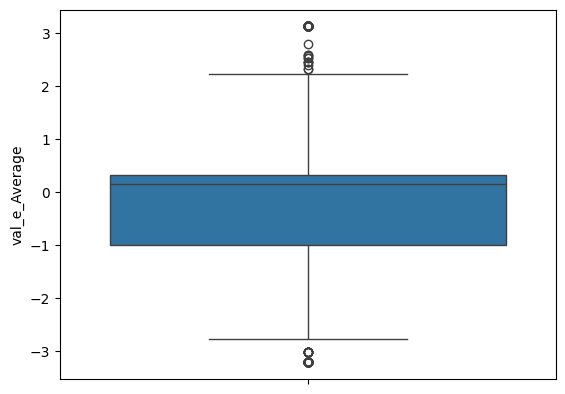

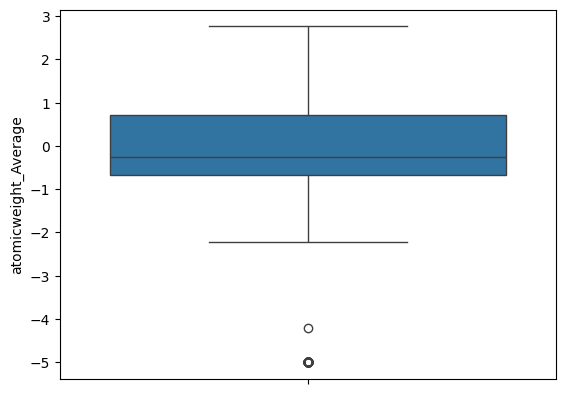

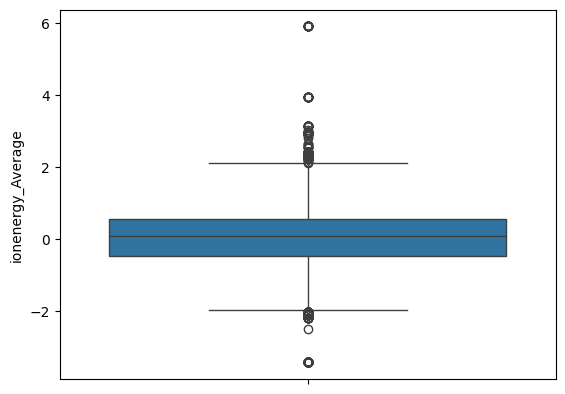

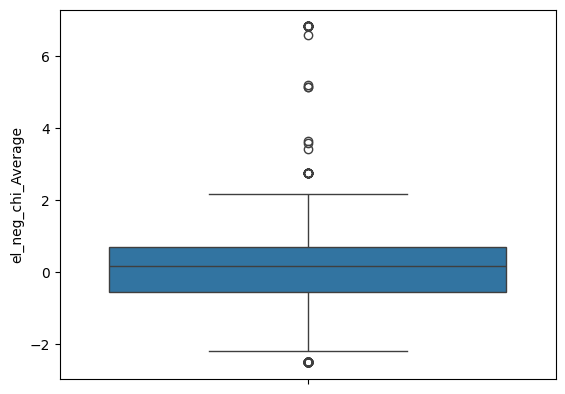

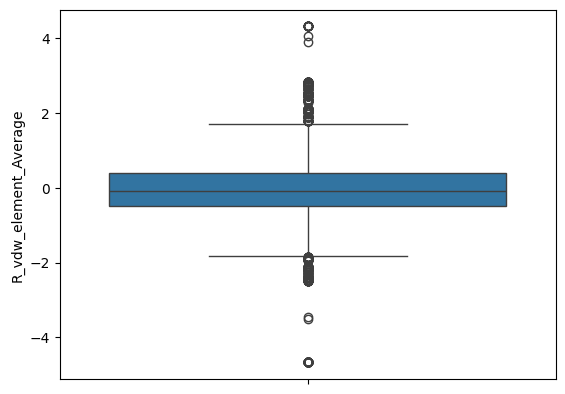

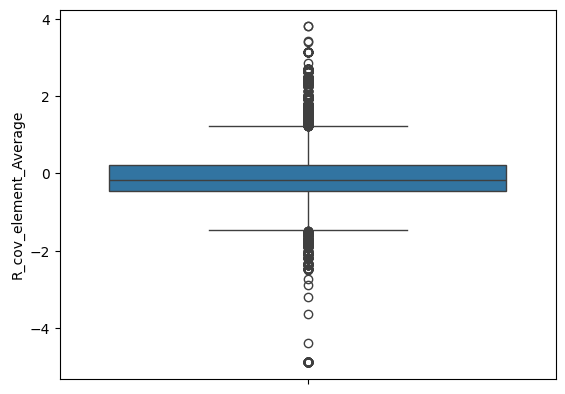

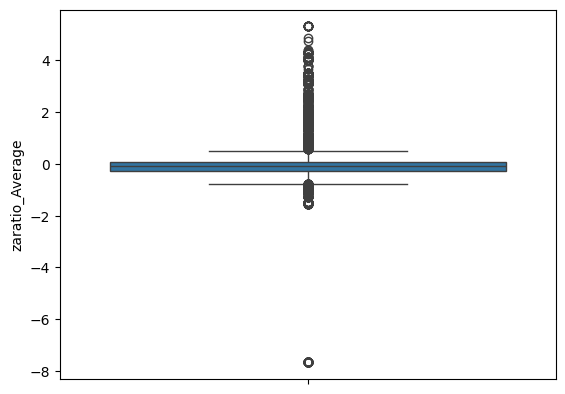

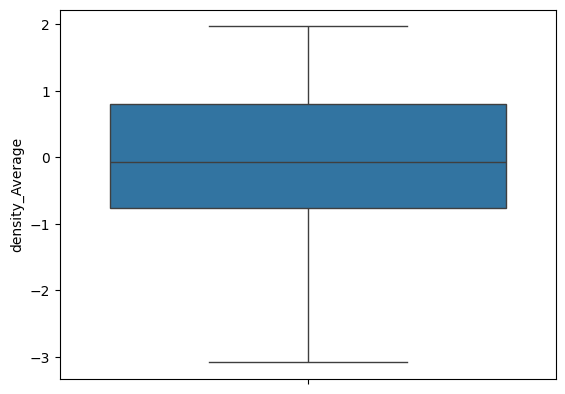

In [72]:
for i in X.columns :
  sns.boxplot(X[i])
  plt.show()

In [84]:
def remove_outliers_replace(data, columns, threshold=1.5):
    data_no_outliers = data.copy()

    for column in columns:
        Q1 = data_no_outliers[column].quantile(0.25)
        Q3 = data_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        is_outlier = (data_no_outliers[column] < lower_bound) | (data_no_outliers[column] > upper_bound)

        if data_no_outliers[column].dtype == 'O':  # Categorical column
            median_value = data_no_outliers.loc[~is_outlier, column].mode().iloc[0]
            data_no_outliers.loc[is_outlier, column] = median_value
        else:  # Numerical column
            mean_value = data_no_outliers.loc[~is_outlier, column].mean()
            data_no_outliers.loc[is_outlier, column] = mean_value

    return data_no_outliers

# columns  = ['Age' , 'Credit']
X = remove_outliers_replace(X, X.columns)

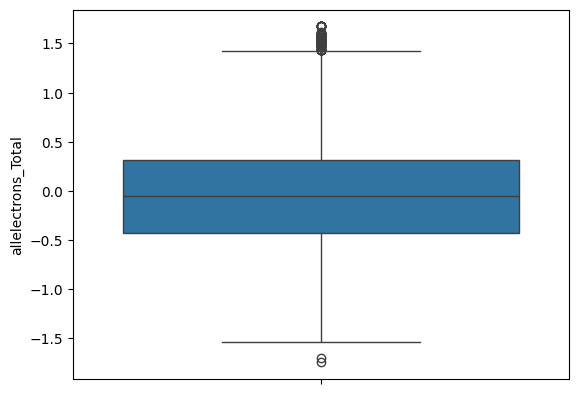

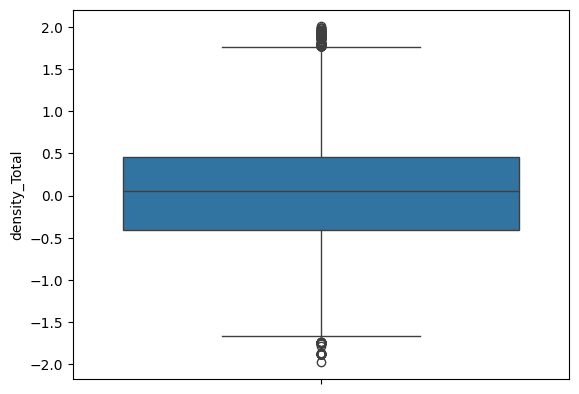

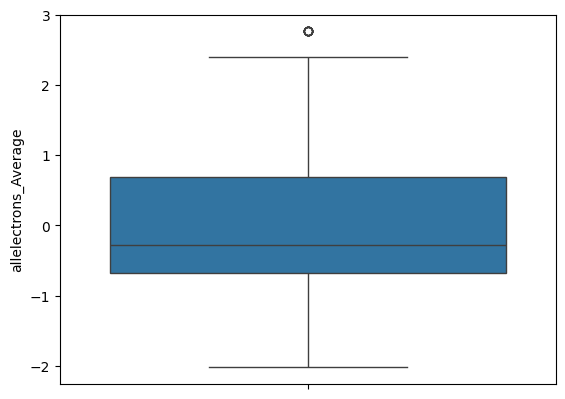

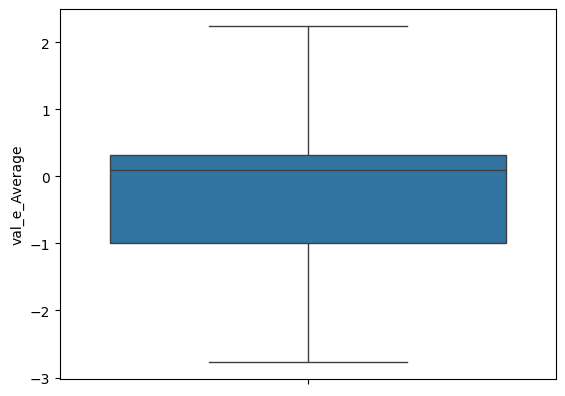

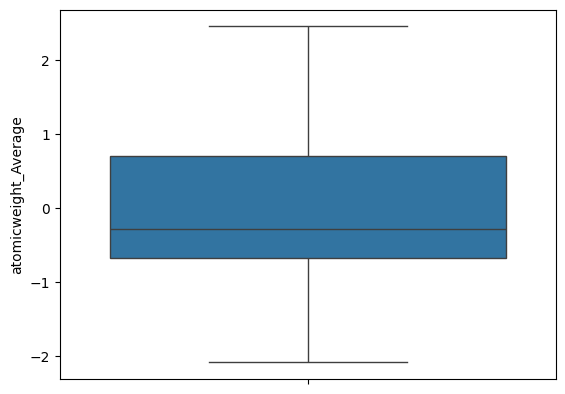

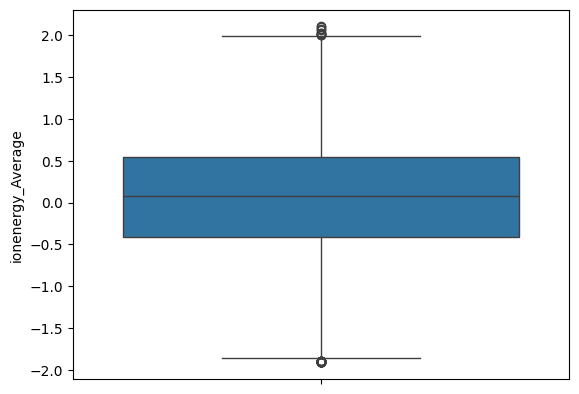

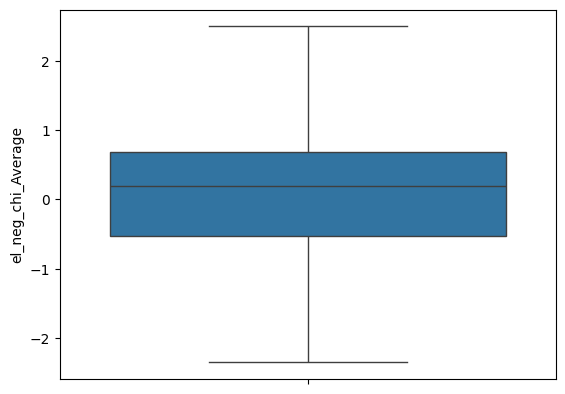

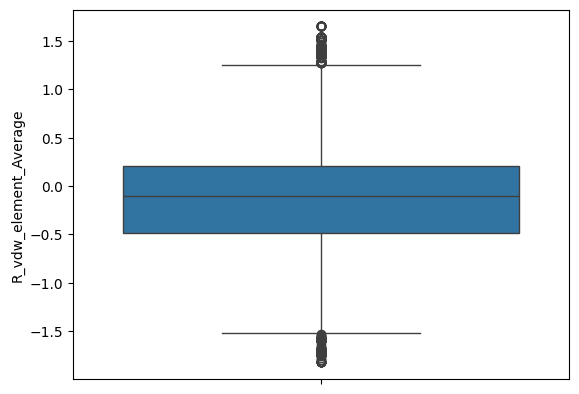

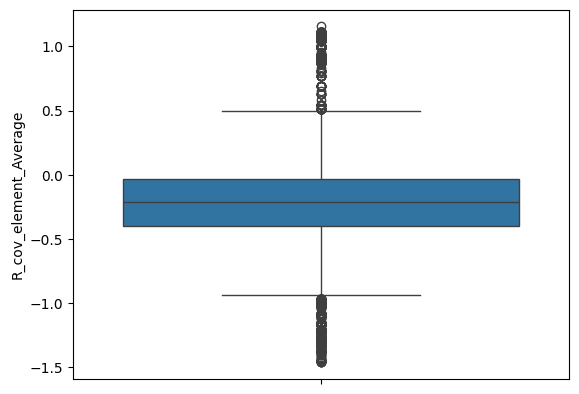

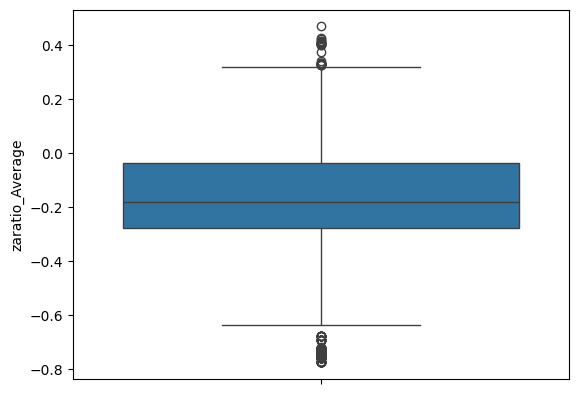

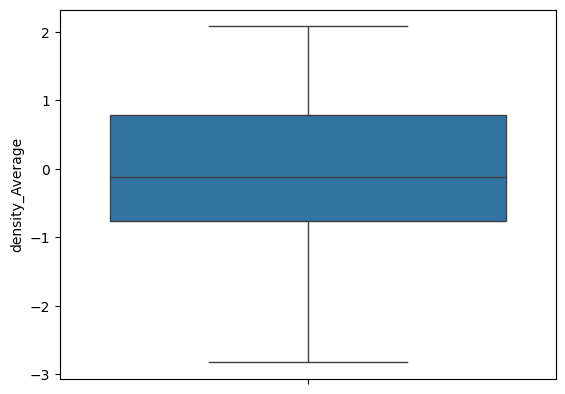

In [85]:
for i in X.columns :
  sns.boxplot(X[i])
  plt.show()

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
s = scaler.fit(X)
X = s.transform(X)

In [74]:
X

array([[0.33409747, 0.08656146, 0.55816032, ..., 0.50719826, 0.59496343,
        0.49097889],
       [0.33409747, 0.31141308, 0.55816032, ..., 0.54039637, 0.59070982,
        0.42720863],
       [0.30843336, 0.33303374, 0.65908655, ..., 0.50985869, 0.57632251,
        0.62402495],
       ...,
       [0.40010351, 0.51199817, 0.76221529, ..., 0.67653167, 0.56111315,
        0.70925077],
       [0.2472954 , 0.13352735, 0.61161215, ..., 0.58635429, 0.58277932,
        0.44804311],
       [0.44019529, 0.47818799, 0.58252732, ..., 0.56019873, 0.59223458,
        0.50875058]])

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train , y_train)

LinearRegression()

In [20]:
pred = model.predict(X_test)

In [90]:
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as sm

models = [DecisionTreeRegressor() , LGBMRegressor() , XGBRegressor() , LinearRegression() , KNeighborsRegressor()]

for model in models :
  model.fit(X_train , y_train)
  pred = model.predict(X_test)
  print(sm.mean_absolute_error(y_test , pred))


1.2658693563880883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2389
[LightGBM] [Info] Number of data points in the train set: 8325, number of used features: 11
[LightGBM] [Info] Start training from score 4.650150
0.9097295984008607
0.9479414472731116
1.185802690061516
1.0347406340057637


In [44]:
model = LGBMRegressor()
model.fit(X_train , y_train)
pred = model.predict(X_test)
print(sm.mean_absolute_error(y_test , pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2459
[LightGBM] [Info] Number of data points in the train set: 8325, number of used features: 11
[LightGBM] [Info] Start training from score 4.650150
0.8967391951103775


In [81]:
test.drop('id' , axis = 1 , inplace = True)



In [82]:
for i in test.columns :
  df = test[i].to_numpy().reshape(-1,1)
  df = transform.fit_transform(df)
  test[i] = df

In [48]:
test = s.transform(test)

In [83]:
pd.DataFrame(model.predict(test)).to_csv('f.csv')